Step 1: Upload the Data to Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
ratings_path = '/content/drive/MyDrive/title.ratings.tsv.gz'
basics_path = '/content/drive/MyDrive/title.basics.tsv.gz'
zip_path = '/content/drive/MyDrive/rotten_tomatoes_critic_reviews.csv.zip'


In [4]:
import gzip
import shutil
import zipfile
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Paths to the datasets
ratings_path = '/content/drive/MyDrive/title.ratings.tsv.gz'
basics_path = '/content/drive/MyDrive/title.basics.tsv.gz'
zip_path = '/content/drive/MyDrive/rotten_tomatoes_critic_reviews.csv.zip'

# Extracting the gzipped ratings file
with gzip.open(ratings_path, 'rb') as f_in:
    with open('title.ratings.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Extracting the gzipped basics file
with gzip.open(basics_path, 'rb') as f_in:
    with open('title.basics.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

# Extracting the zip file for Rotten Tomatoes reviews
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Load the Data

In [5]:
import pandas as pd

ratings_df = pd.read_csv('title.ratings.tsv', sep='\t')
basics_df = pd.read_csv('title.basics.tsv', sep='\t', low_memory=False)
rotten_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews.csv')

# Optional: preview
print(ratings_df.head())
print(basics_df.head())
print(rotten_reviews_df.head())


      tconst  averageRating  numVotes
0  tt0000001            5.7      2151
1  tt0000002            5.5       292
2  tt0000003            6.5      2187
3  tt0000004            5.3       187
4  tt0000005            6.2      2933
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12 

Step 3: Visualize the Distribution of IMDb Average Ratings

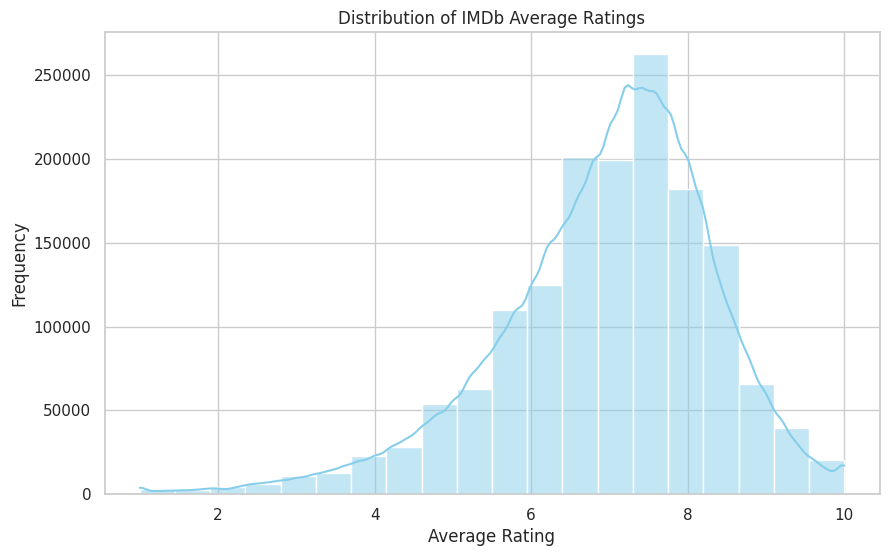

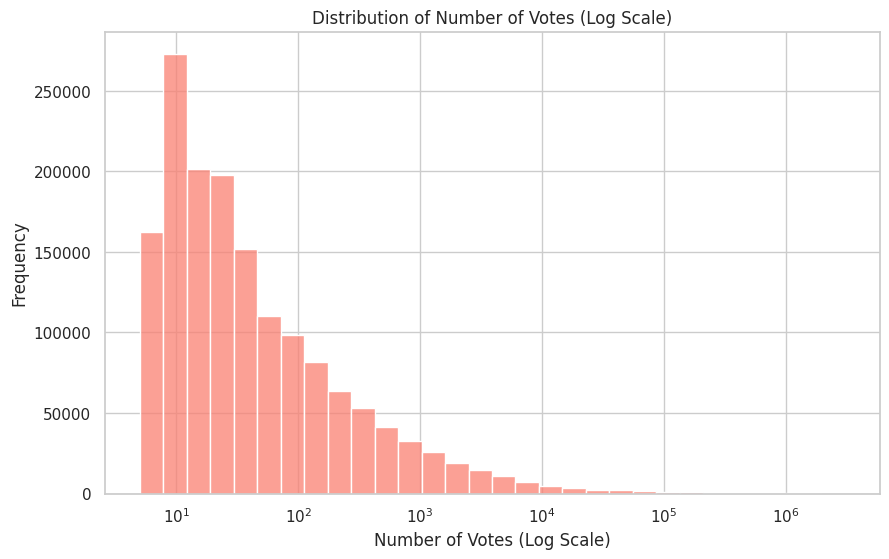

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Plot 1: Distribution of average ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['averageRating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Plot 2: Distribution of number of votes (with log scale for better readability)
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['numVotes'], bins=30, kde=False, log_scale=(True, False), color='salmon')
plt.title('Distribution of Number of Votes (Log Scale)')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('Frequency')
plt.show()
